Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# Carregando os dados em um dataframe

In [3]:
airbnb = pd.read_csv('/content/drive/MyDrive/Airbnb_NYC.csv')
airbnb.head()

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
0,Bronx,40.80011,-73.91330,PrivateRoom,21.0,2.0,291,19,0.27,60.0
1,Bronx,40.80024,-73.91422,PrivateRoom,3.0,1.0,0,59,2.93,49.0
2,Bronx,40.80074,-73.91574,PrivateRoom,3.0,1.0,354,3,0.87,50.0
3,Bronx,40.80091,-73.91449,PrivateRoom,21.0,2.0,117,18,0.36,71.0
4,Bronx,40.80143,-73.91353,EntireHome,2.0,3.0,0,12,3.50,115.0


* Algumas informações sobre o dataframe:

In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38733 entries, 0 to 38732
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Boroughs          38733 non-null  object 
 1   Latitude          38733 non-null  float64
 2   Longitude         38733 non-null  float64
 3   Prop_Type         38733 non-null  object 
 4   Min_Nights        38695 non-null  float64
 5   Host_Listing_Cnt  38378 non-null  float64
 6   Days_Available    38733 non-null  int64  
 7   Review_Cnt        38733 non-null  int64  
 8   Reviews30d        38733 non-null  float64
 9   Price             38724 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 3.0+ MB


# Estatísticas descritivas

In [5]:
airbnb.describe()

,Latitude,Longitude,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,38733.000000,38733.000000,38695.000000,38378.000000,38733.000000,38733.000000,38733.000000,38724.000000
mean,40.727848,-73.950735,5.523659,2.987545,114.234890,29.510650,1.365694,140.879248
std,0.055274,0.047167,10.817380,8.413190,130.182077,48.654548,1.692891,194.490892
min,40.506410,-74.244420,1.000000,1.000000,0.000000,1.000000,0.010000,10.000000
25%,40.688450,-73.982290,1.000000,1.000000,0.000000,3.000000,0.190000,68.000000
50%,40.721490,-73.954600,2.000000,1.000000,50.000000,10.000000,0.710000,100.000000
75%,40.762810,-73.934460,4.000000,2.000000,234.000000,33.000000,2.000000,169.000000
max,40.912400,-73.712990,300.000000,96.000000,365.000000,639.000000,66.610000,10000.000000


# Tratamento dos dados faltantes

Algumas colunas possuem dados faltantes e é importante analisar esses dados.

In [6]:
airbnb.isna().sum()

Boroughs              0
Latitude              0
Longitude             0
Prop_Type             0
Min_Nights           38
Host_Listing_Cnt    355
Days_Available        0
Review_Cnt            0
Reviews30d            0
Price                 9
dtype: int64

In [7]:
f'O número de dados no dataframe é {airbnb.shape}'

'O número de dados no dataframe é (38733, 10)'

Como a quantidade de dados faltantes é muito pequena quando comparado a quantidade total de dados, opta-se por eliminá-los do dataframe.

In [8]:
airbnb.dropna(inplace= True)

Verificando se os dados faltantes foram retirados:

In [9]:
airbnb.isna().sum()

Boroughs            0
Latitude            0
Longitude           0
Prop_Type           0
Min_Nights          0
Host_Listing_Cnt    0
Days_Available      0
Review_Cnt          0
Reviews30d          0
Price               0
dtype: int64

# Tratamento das variáveis categóricas

In [10]:
airbnb.head(2)

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
0,Bronx,40.80011,-73.91330,PrivateRoom,21.0,2.0,291,19,0.27,60.0
1,Bronx,40.80024,-73.91422,PrivateRoom,3.0,1.0,0,59,2.93,49.0


Algumas colunas contêm variáveis categóricas, é o caso das colunas **Boroughs** e **Prop_Type**. Então, é necessário fazer um tratamento tornando em variáveis dummies.

In [11]:
categorical_dummies = pd.get_dummies(airbnb[['Boroughs', 'Prop_Type']])

In [12]:
categorical_dummies.head()

,Boroughs_Bronx,Boroughs_Brooklyn,Boroughs_Manhattan,Boroughs_Queens,Boroughs_Staten Island,Prop_Type_EntireHome,Prop_Type_PrivateRoom,Prop_Type_SharedRoom
0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0


Unem-se os dois dataframes:

In [13]:
# a variável contendo os dados do AirBNB é subscrita:

air_bnb = pd.concat([categorical_dummies, airbnb], axis= 1)

In [14]:
air_bnb.head()

,Boroughs_Bronx,Boroughs_Brooklyn,Boroughs_Manhattan,Boroughs_Queens,Boroughs_Staten Island,Prop_Type_EntireHome,Prop_Type_PrivateRoom,Prop_Type_SharedRoom,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
0,1,0,0,0,0,0,1,0,Bronx,40.80011,-73.91330,PrivateRoom,21.0,2.0,291,19,0.27,60.0
1,1,0,0,0,0,0,1,0,Bronx,40.80024,-73.91422,PrivateRoom,3.0,1.0,0,59,2.93,49.0
2,1,0,0,0,0,0,1,0,Bronx,40.80074,-73.91574,PrivateRoom,3.0,1.0,354,3,0.87,50.0
3,1,0,0,0,0,0,1,0,Bronx,40.80091,-73.91449,PrivateRoom,21.0,2.0,117,18,0.36,71.0
4,1,0,0,0,0,1,0,0,Bronx,40.80143,-73.91353,EntireHome,2.0,3.0,0,12,3.50,115.0


As colunas **Boroughs** e **Prop_Type** originais são removidas do dataframe, além das colunas de **Latitude** e **Longitude**.

In [15]:
# air_bnb.drop(['Boroughs', 'Prop_Type', 'Latitude', 'Longitude'], axis= 1, inplace= True)
air_bnb.drop(['Boroughs', 'Prop_Type'], axis= 1, inplace= True)

# Análise de correlação

In [16]:
air_bnb.corr()

,Boroughs_Bronx,Boroughs_Brooklyn,Boroughs_Manhattan,Boroughs_Queens,Boroughs_Staten Island,Prop_Type_EntireHome,Prop_Type_PrivateRoom,Prop_Type_SharedRoom,Latitude,Longitude,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
Boroughs_Bronx,1.000000,-0.133473,-0.131015,-0.057250,-0.014332,-0.053287,0.042474,0.037320,0.335282,0.217558,-0.030946,-0.014473,0.071283,0.009990,0.040278,-0.046793
Boroughs_Brooklyn,-0.133473,1.000000,-0.734807,-0.321090,-0.080381,-0.037237,0.045771,-0.028757,-0.672552,-0.012797,-0.041289,-0.080360,-0.056271,0.000181,-0.040126,-0.083735
Boroughs_Manhattan,-0.131015,-0.734807,1.000000,-0.315175,-0.078900,0.122378,-0.122464,-0.000778,0.597610,-0.413461,0.088125,0.097128,-0.049467,-0.031302,-0.065982,0.158574
Boroughs_Queens,-0.057250,-0.321090,-0.315175,1.000000,-0.034477,-0.101771,0.093758,0.028200,0.016509,0.629884,-0.052819,-0.016458,0.107925,0.038217,0.133921,-0.084382
Boroughs_Staten Island,-0.014332,-0.080381,-0.078900,-0.034477,1.000000,-0.007933,0.008618,-0.002268,-0.195252,-0.302985,-0.012591,-0.006635,0.068460,0.015022,0.028858,-0.024241
Prop_Type_EntireHome,-0.053287,-0.037237,0.122378,-0.101771,-0.007933,1.000000,-0.957068,-0.155070,-0.027632,-0.168100,0.104950,0.031805,-0.033653,-0.015065,-0.040839,0.281882
Prop_Type_PrivateRoom,0.042474,0.045771,-0.122464,0.093758,0.008618,-0.957068,1.000000,-0.137946,0.022597,0.161342,-0.099936,-0.041537,0.014580,0.020725,0.037728,-0.265290
Prop_Type_SharedRoom,0.037320,-0.028757,-0.000778,0.028200,-0.002268,-0.155070,-0.137946,1.000000,0.017403,0.024502,-0.018005,0.032888,0.065296,-0.019160,0.010958,-0.059014
Latitude,0.335282,-0.672552,0.597610,0.016509,-0.195252,-0.027632,0.022597,0.017403,1.000000,0.085304,0.036295,0.042976,-0.020068,-0.007500,-0.018449,0.030502
Longitude,0.217558,-0.012797,-0.413461,0.629884,-0.302985,-0.168100,0.161342,0.024502,0.085304,1.000000,-0.080927,-0.037452,0.112270,0.051610,0.159286,-0.148285


In [17]:
# cores do gráfico de calor:

# colors = sns.color_palette('light:blue', as_cmap= True)

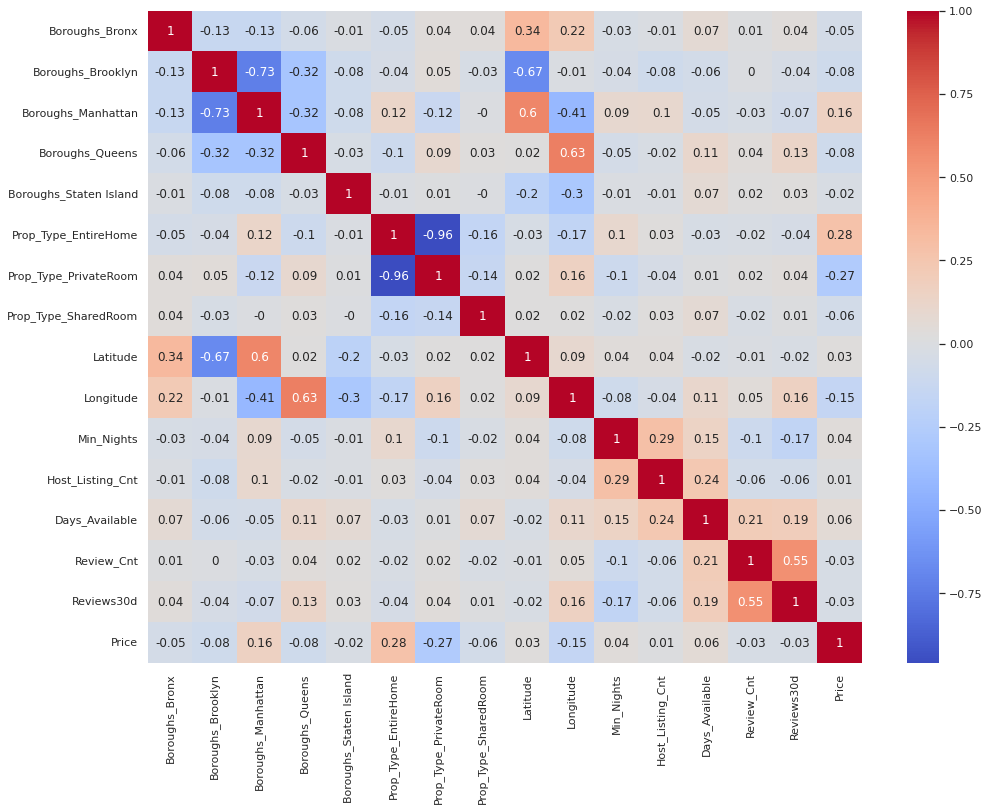

In [18]:
plt.figure(figsize= (16, 12))
ax = sns.heatmap(air_bnb.corr().round(2), annot= True, cmap= 'coolwarm')

# Análises gráficas

## Distribuição da variável Price

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


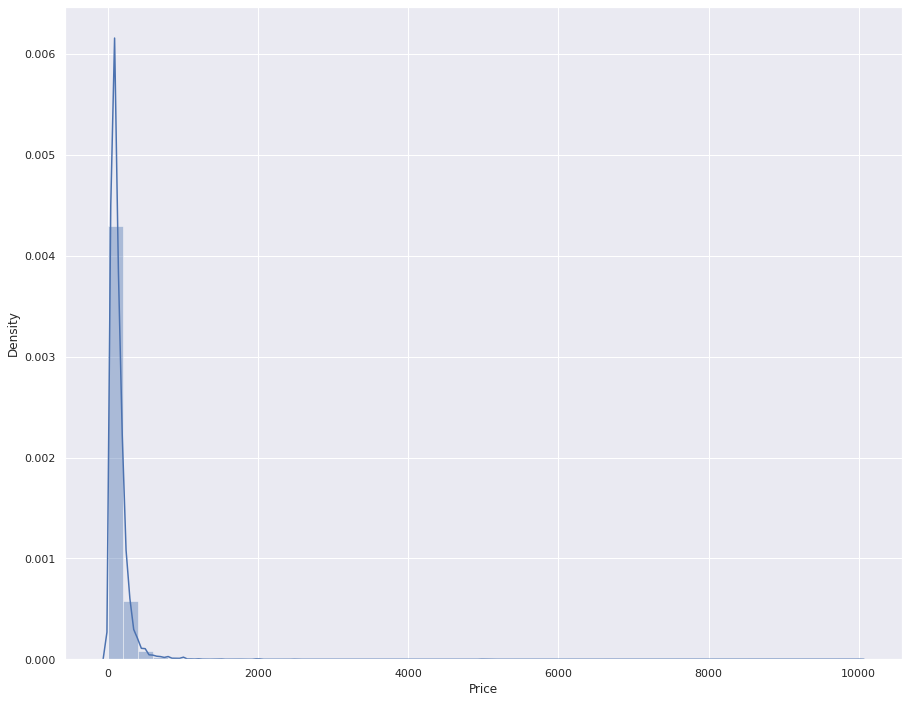

In [19]:
plt.figure(figsize= (15, 12))
ax = sns.distplot(air_bnb['Price'], bins= 50)
plt.show()

## Pairplot da variável Price

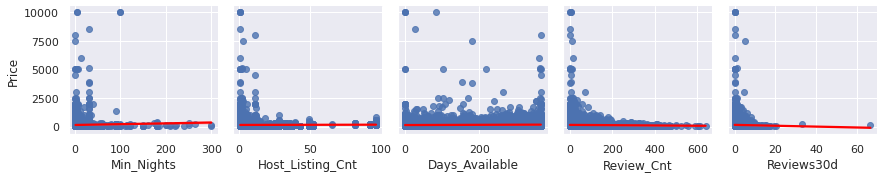

In [20]:
ax = sns.pairplot(
    data= air_bnb, y_vars= 'Price', 
    x_vars=['Min_Nights', 'Host_Listing_Cnt', 'Days_Available', 'Review_Cnt', 'Reviews30d'], 
    kind= 'reg',
    plot_kws= {'line_kws': {'color': 'red'}}
)

# Modelo de Regressão Linear

In [21]:
from sklearn.model_selection import train_test_split

## Instanciando a variável dependente (y)

In [22]:
y = air_bnb['Price']

## Instanciando dataframe com as variáveis indepentes (X)

In [23]:
air_bnb.columns

Index(['Boroughs_Bronx', 'Boroughs_Brooklyn', 'Boroughs_Manhattan',
       'Boroughs_Queens', 'Boroughs_Staten Island', 'Prop_Type_EntireHome',
       'Prop_Type_PrivateRoom', 'Prop_Type_SharedRoom', 'Latitude',
       'Longitude', 'Min_Nights', 'Host_Listing_Cnt', 'Days_Available',
       'Review_Cnt', 'Reviews30d', 'Price'],
      dtype='object')

In [24]:
X = air_bnb[
    [
        'Boroughs_Bronx', 'Boroughs_Brooklyn', 'Boroughs_Manhattan',
       'Boroughs_Queens', 'Boroughs_Staten Island', 'Prop_Type_EntireHome',
       'Prop_Type_PrivateRoom', 'Prop_Type_SharedRoom', 'Min_Nights',
       'Host_Listing_Cnt', 'Days_Available', 'Review_Cnt', 'Reviews30d'
    ]
]

## Criando os dados de treino e teste

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 101)

## Definindo o modelo

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Instanciando a classe LinearRegression()

In [27]:
model = LinearRegression()

### Estimação do modelo

In [28]:
model.fit(X_train, y_train)

LinearRegression()

### Obtendo o R² do modelo estimado de treino

In [29]:
f'R²: {model.score(X_train, y_train).round(2)}'

'R²: 0.1'

### Gerando previsões para os dados de teste

In [30]:
y_predict = model.predict(X_test)

### Obtendo o R² e RSME para as previsões do

In [31]:
f'R²: {metrics.r2_score(y_test, y_predict). round(2)}'

'R²: 0.13'

In [32]:
f'RSME: {np.sqrt(metrics.mean_squared_error(y_test, y_predict)).round(2)}'

'RSME: 160.98'

# Coeficientes do modelo

In [33]:
index= ['Intercept', 'Boroughs_Bronx', 'Boroughs_Brooklyn', 'Boroughs_Manhattan',
       'Boroughs_Queens', 'Boroughs_Staten Island', 'Prop_Type_EntireHome',
       'Prop_Type_PrivateRoom', 'Prop_Type_SharedRoom', 'Min_Nights',
       'Host_Listing_Cnt', 'Days_Available', 'Review_Cnt', 'Reviews30d']

In [34]:
coefs = pd.DataFrame(np.append(model.intercept_, model.coef_), index= index)
coefs.columns = ['Parâmetros']
coefs

,Parâmetros
Intercept,78.389208
Boroughs_Bronx,-24.143999
Boroughs_Brooklyn,10.984824
Boroughs_Manhattan,58.359391
Boroughs_Queens,-11.208770
Boroughs_Staten Island,-33.991445
Prop_Type_EntireHome,78.867793
Prop_Type_PrivateRoom,-25.041955
Prop_Type_SharedRoom,-53.825838
Min_Nights,-0.452884


# Testando um novo modelo

Uma possibilidade de tentar melhorar o modelo é remover os outliers.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


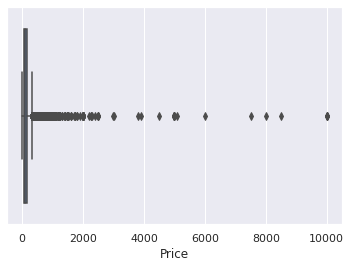

In [35]:
sns.boxplot(air_bnb['Price'])

Definição dos quartis, intervalo interquatídico e outros parâmetros:

In [36]:
prices = air_bnb['Price']

In [37]:
Q1 = prices.quantile(.25)
Q3 = prices.quantile(.75)
IIQ = Q3 - Q1
inferior = Q1 - (1.5 * IIQ)
superior = Q3 + (1.5 * IIQ)

Remoção dos dados discrepantes:

In [38]:
air_bnb = air_bnb.loc[(prices >= inferior) & (prices <= superior)]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


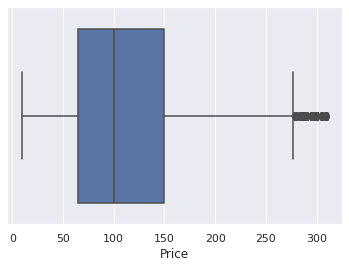

In [39]:
sns.boxplot(air_bnb['Price'])

## Novo modelo

O novo modelo utiliza os dados após a retirada dos *outliers* da variável preço.

In [40]:
air_bnb.columns

Index(['Boroughs_Bronx', 'Boroughs_Brooklyn', 'Boroughs_Manhattan',
       'Boroughs_Queens', 'Boroughs_Staten Island', 'Prop_Type_EntireHome',
       'Prop_Type_PrivateRoom', 'Prop_Type_SharedRoom', 'Latitude',
       'Longitude', 'Min_Nights', 'Host_Listing_Cnt', 'Days_Available',
       'Review_Cnt', 'Reviews30d', 'Price'],
      dtype='object')

* Instancia-se a variável X:

In [41]:
X = air_bnb[
    [
      'Boroughs_Bronx', 'Boroughs_Brooklyn', 'Boroughs_Manhattan',
       'Boroughs_Queens', 'Boroughs_Staten Island', 'Prop_Type_EntireHome',
       'Prop_Type_PrivateRoom', 'Prop_Type_SharedRoom', 'Latitude',
       'Longitude', 'Min_Nights', 'Host_Listing_Cnt', 'Days_Available',
       'Review_Cnt', 'Reviews30d'  
    ]
]

* E a variável y:

In [42]:
y = air_bnb['Price']

* Os dados de treino e teste também são definidos:

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

* Instancia-se a classe *LinearRegression*:

In [104]:
lr = LinearRegression()

* Treina-se o modelo:

In [105]:
lr.fit(X_train, y_train)

LinearRegression()

* O R² de treino é determinado:

In [106]:
f'O R² de treino é: {lr.score(X_train, y_train).round(2)}'

'O R² de treino é: 0.49'

* E as predições são realizadas passando o X_test:

In [107]:
y_predict = lr.predict(X_test)

* O R² do modelo preditivo é determinado:

In [108]:
f'O R² do modelo preditivo é: {metrics.r2_score(y_test, y_predict).round(2)}'

'O R² do modelo preditivo é: 0.5'

Observa-se uma melhora considerável quando comparamos o 1º modelo com este. A remoção dos *outliers*, imóveis com preços elevados, pareceu ajustar melhor os dados para definição do modelo preditivo.

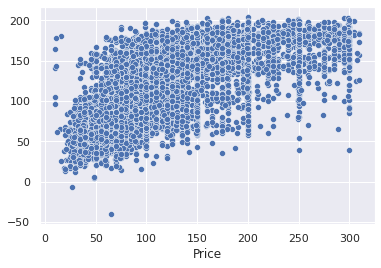

In [109]:
sns.scatterplot(x= y_test, y= y_predict)

* Intercepto e coeficientes de determinação:

In [110]:
X.columns

Index(['Boroughs_Bronx', 'Boroughs_Brooklyn', 'Boroughs_Manhattan',
       'Boroughs_Queens', 'Boroughs_Staten Island', 'Prop_Type_EntireHome',
       'Prop_Type_PrivateRoom', 'Prop_Type_SharedRoom', 'Latitude',
       'Longitude', 'Min_Nights', 'Host_Listing_Cnt', 'Days_Available',
       'Review_Cnt', 'Reviews30d'],
      dtype='object')

In [111]:
index = ['Intercept', 'Boroughs_Bronx', 'Boroughs_Brooklyn', 'Boroughs_Manhattan',
          'Boroughs_Queens', 'Boroughs_Staten Island', 'Prop_Type_EntireHome',
          'Prop_Type_PrivateRoom', 'Prop_Type_SharedRoom', 'Latitude',
          'Longitude', 'Min_Nights', 'Host_Listing_Cnt', 'Days_Available',
          'Review_Cnt', 'Reviews30d']

In [112]:
pd.DataFrame(np.append(lr.intercept_, lr.coef_), index= index)

,0
Intercept,-17555.009006
Boroughs_Bronx,8.200420
Boroughs_Brooklyn,4.979085
Boroughs_Manhattan,33.732920
Boroughs_Queens,16.773849
Boroughs_Staten Island,-63.686274
Prop_Type_EntireHome,58.799263
Prop_Type_PrivateRoom,-15.852405
Prop_Type_SharedRoom,-42.946859
Latitude,-61.350633
